In [8]:
from google.colab import files
uploaded = files.upload()
# Now select the file: customer_data.csv

Saving customer_data.csv to customer_data (1).csv


In [9]:

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("customer_data.csv")
df.head()


,recency,frequency,monetary,tenure
0,103,2,15986.074061,1282
1,349,3,13034.282222,1729
2,271,49,14069.140857,1280
3,107,37,15936.274122,1712
4,72,49,17811.106302,1585


from matplotlib import pyplot as plt
_df_0['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='monetary', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
# 📌 Step 2: KMeans Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
df.head()


,recency,frequency,monetary,tenure,cluster
0,103,2,15986.074061,1282,1
1,349,3,13034.282222,1729,0
2,271,49,14069.140857,1280,3
3,107,37,15936.274122,1712,3
4,72,49,17811.106302,1585,3


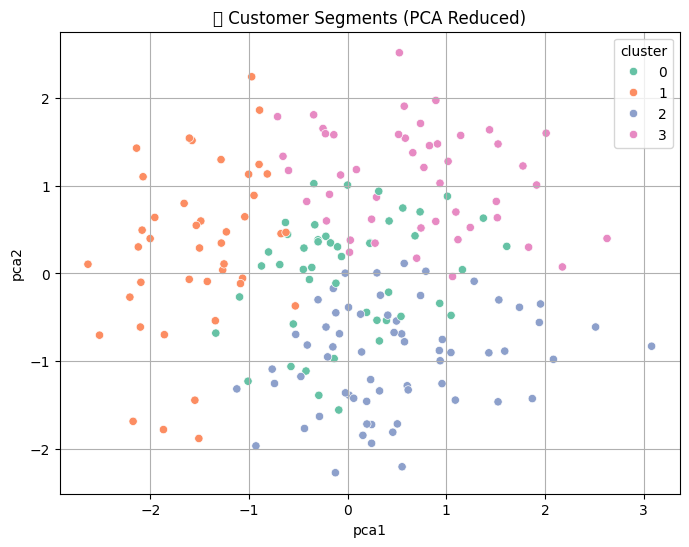

In [11]:
# 📌 Step 3: PCA for Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'], df['pca2'] = components[:, 0], components[:, 1]

# Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("📊 Customer Segments (PCA Reduced)")
plt.grid(True)
plt.show()


In [13]:
!pip install streamlit
!pip install pyngrok
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

@st.cache_data
def load_model_and_data():
    data = pd.read_csv("customer_data.csv")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    model = KMeans(n_clusters=4, random_state=42)
    model.fit(X_scaled)
    return scaler, model

scaler, kmeans_model = load_model_and_data()

# Streamlit UI
st.title("🧠 Customer Segmentation App")
st.write("Input customer behavior data to determine the segment they belong to.")

# Input sliders
recency = st.slider("Recency (days since last purchase)", 1, 365, 90)
frequency = st.slider("Frequency (number of purchases)", 1, 50, 10)
monetary = st.slider("Monetary Value (₹)", 100.0, 20000.0, 5000.0, step=100.0)
tenure = st.slider("Tenure (days since first purchase)", 30, 2000, 365)

# Prepare input and predict
input_data = np.array([[recency, frequency, monetary, tenure]])
scaled_input = scaler.transform(input_data)
predicted_cluster = kmeans_model.predict(scaled_input)[0]

# Output result
st.subheader("🧩 Assigned Customer Segment:")
st.success(f"Segment {predicted_cluster}")
!streamlit run app.py & npx localtunnel --port 8501


UsageError: Line magic function `%%writefile` not found.


In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load model/data
@st.cache_data
def load_model_and_data():
    data = pd.read_csv("customer_data.csv")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    model = KMeans(n_clusters=4, random_state=42)
    model.fit(X_scaled)
    return scaler, model, data

scaler, kmeans_model, df_data = load_model_and_data()

# UI Inputs
st.title("🧠 Customer Segmentation App")
st.write("Input customer behavior data to determine segment")

recency = st.slider("Recency (days since last purchase)", 1, 365, 90)
frequency = st.slider("Frequency (number of purchases)", 1, 50, 10)
monetary = st.slider("Monetary Value (£)", 100.0, 20000.0, 5000.0, 100.0)
tenure = st.slider("Tenure (days since first purchase)", 30, 2000, 365)

# Prediction
input_data = np.array([[recency, frequency, monetary, tenure]])
scaled_input = scaler.transform(input_data)
predicted_cluster = kmeans_model.predict(scaled_input)[0]

st.subheader("🧩 Assigned Cluster:")
st.success(f"Customer belongs to Segment {predicted_cluster}")

st.subheader("📊 Data Overview:")
st.write(df_data.head())

st.subheader("Cluster Distribution:")
cluster_counts = df_data['cluster'].value_counts().sort_index()
st.bar_chart(cluster_counts)

Overwriting app.py


In [15]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.133.190:8501

⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://lovely-dots-join.loca.lt
  Stopping...
^C
